# Spam SMS Detection

<h1>1.Loading the data</h1>

In [3]:
!pip install wordcloud

In [32]:
!pip install nltk

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
sms= pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])

In [87]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
sms.shape

(5572, 2)

In [89]:
sms.drop_duplicates(inplace=True)

In [90]:
sms.reset_index(drop=True,inplace=True)

In [91]:
sms.shape

(5169, 2)

<h1>2.Exploratory data analysis</h1>

In [96]:
sms['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

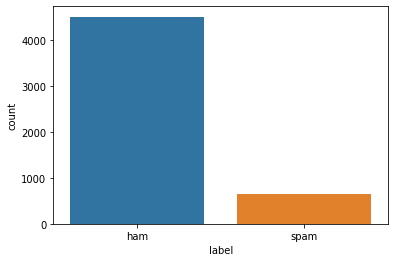

In [97]:
sns.countplot(x='label',data=sms)

->The ham messages are in very large numbers as compared to spam.

In [98]:
from wordcloud import WordCloud, STOPWORDS

In [99]:
data=sms.loc[sms['label']=='spam']
data.head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [100]:
words=' '.join(data['message'])

In [101]:
print(words)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [102]:
wordcloud=WordCloud(stopwords=STOPWORDS,
                    background_color='black',
                   width=1600,
                   height=800).generate(words)

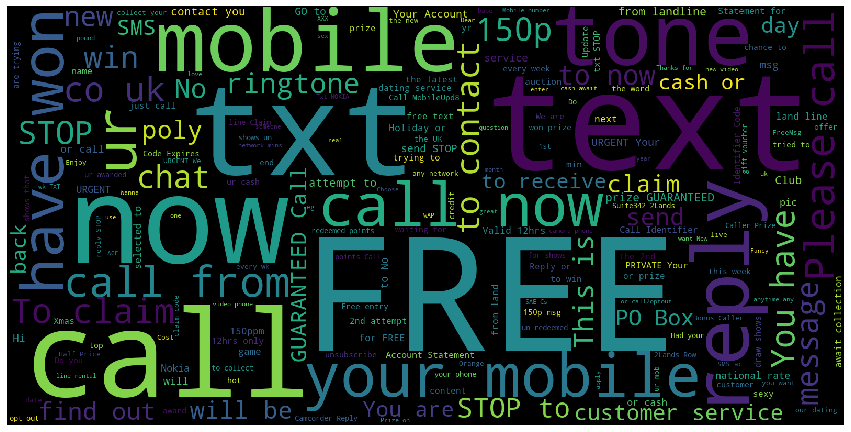

In [104]:
#wordcloud for the spam messages
plt.figure(figsize=[15,15])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


<h1>3.Data Preprocessing</h1>

It includes several steps:<br>
1.Remove special characters<br>
2.Conversion to lowercase<br>
3.Tokenization<br>
4.Stemming or Lemmatization<br>


In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhanupriya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bhanupriya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [108]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [109]:
clean_lst=[]
sms_len_lst=[]

In [110]:
def preprocess(sms,flag):
    #remove special characters
    letters=re.sub("[^a-zA-Z]"," ",sms )
    
    #changes to lowercase
    letters=letters.lower()
    
    #tokenzing each message
    words=letters.split()
    
    #remove stopwords
    words=[w for w in words if not w in stopwords.words("english")]
    
    #stemming/lemmatiazing
    if(flag=='stem'):
        words=[stemmer.stem(word)for word in words]
    else:
        words=[lemmatizer.lemmatize(word) for word in words]
    
    clean_lst.append(" ".join(words))
     
    sms_len_lst.append(len(words))
    

In [111]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [112]:
%%time
clean_lst=[]
sms_len_lst=[]
sms['message'].apply(lambda x:preprocess(x,'lemma'))
sms['clean_sms_lema']=clean_lst
sms['sms_length_lema']=sms_len_lst

Wall time: 35.5 s


In [113]:
sms.head()

,label,message,clean_sms_lema,sms_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


<h1>4.Data Preparation</h1>

In [114]:
#preparing the target variable
sms['spam_ham']=sms['label'].apply(lambda x: 0 if x=='spam' else 1)
sms.head()

,label,message,clean_sms_lema,sms_length_lema,spam_ham
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7,1


In [115]:
Y=sms.pop('spam_ham')

In [116]:
X=sms

In [117]:
#splitting into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,\
                                               Y,\
                                               test_size=0.2,\
                                               random_state=42)

In [118]:
train_clean_sms=[]
for sms in X_train['clean_sms_lema']:
    train_clean_sms.append(sms)

test_clean_sms=[]
for sms in X_test['clean_sms_lema']:
    test_clean_sms.append(sms)

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer='word')
train_features=vectorizer.fit_transform(train_clean_sms)
test_features=vectorizer.transform(test_clean_sms)

In [120]:
vectorizer.vocabulary_

{'oh': 3694,
 'take': 5286,
 'test': 5362,
 'one': 3718,
 'get': 2131,
 'home': 2443,
 'hey': 2396,
 'next': 3557,
 'sun': 5206,
 'basic': 447,
 'yoga': 6184,
 'course': 1139,
 'bugis': 720,
 'go': 2172,
 'pilate': 3957,
 'intro': 2666,
 'sat': 4585,
 'tell': 5341,
 'time': 5464,
 'free': 2012,
 'vote': 5843,
 'wherever': 5977,
 'heart': 2365,
 'guide': 2273,
 'ok': 3698,
 'try': 5603,
 'week': 5939,
 'end': 1632,
 'coimbatore': 1003,
 'see': 4653,
 'cup': 1212,
 'coffee': 1002,
 'animation': 204,
 'hi': 2398,
 'ct': 1193,
 'employee': 1627,
 'bruce': 700,
 'amp': 187,
 'fowler': 1996,
 'mom': 3379,
 'car': 797,
 'park': 3845,
 'long': 3063,
 'story': 5127,
 'need': 3520,
 'detail': 1352,
 'online': 3721,
 'job': 2769,
 'dear': 1279,
 'dave': 1269,
 'final': 1881,
 'notice': 3620,
 'collect': 1011,
 'tenerife': 5351,
 'holiday': 2438,
 'cash': 820,
 'award': 384,
 'call': 763,
 'landline': 2908,
 'tc': 5320,
 'sae': 4551,
 'box': 642,
 'cw': 1234,
 'wx': 6121,
 'ppm': 4071,
 'true': 55

In [121]:
print("Total unique features:",len(vectorizer.vocabulary_))
print("Type of train features:",type(train_features))
print("Shape of input data:",train_features.shape)

Total unique features: 6218
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (4135, 6218)


<h1>5.Model building and evaluation</h1>

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [123]:
classifiers=[LogisticRegression(),
             DecisionTreeClassifier(),
             SVC()]

In [124]:
dense_features=train_features.toarray()
dense_test=test_features.toarray()

In [125]:
for classifier in tqdm(classifiers):
    fit=classifier.fit(dense_features,Y_train)
    pred=fit.predict(dense_test)
    accuracy=metrics.accuracy_score(Y_test,pred)
    con_matrix=metrics.confusion_matrix(Y_test,pred)
    print(classifier.__class__.__name__+":-")
    print("Accuracy="+str(accuracy))
    print(con_matrix)
    print(metrics.classification_report(Y_test,pred))

 33%|███▎      | 1/3 [00:02<00:05,  2.78s/it]

LogisticRegression:-
Accuracy=0.97678916827853
[[119  21]
 [  3 891]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       140
           1       0.98      1.00      0.99       894

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



 67%|██████▋   | 2/3 [00:47<00:15, 15.24s/it]

DecisionTreeClassifier:-
Accuracy=0.9680851063829787
[[123  17]
 [ 16 878]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       140
           1       0.98      0.98      0.98       894

    accuracy                           0.97      1034
   macro avg       0.93      0.93      0.93      1034
weighted avg       0.97      0.97      0.97      1034



100%|██████████| 3/3 [02:10<00:00, 43.50s/it]

SVC:-
Accuracy=0.9787234042553191
[[119  21]
 [  1 893]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       140
           1       0.98      1.00      0.99       894

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

